c:\Users\Louis\anaconda3\envs\RL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[0 0 1 1 2 2] [2 1 3 2 5 2]
['red', 'red', 'blue', 'blue', 'green', 'green']
{0: '0: N. America (2)', 1: '1: S. America (1)', 2: '2: Europe (3)', 3: '3: Africa (2)', 4: '4: Asia (5)', 5: '5: Oceania (2)'}


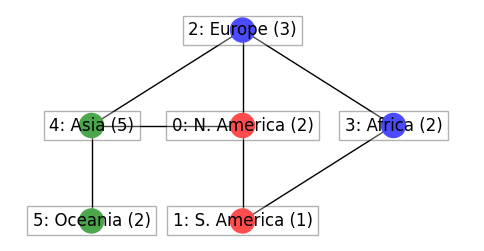

In [1]:
from utils.game import *
from utils.agent import *
from utils.world import *
from utils.viz import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

map_graph = np.array([
    [0, 1, 1, 0, 1, 0],
    [1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])
G = nx.from_numpy_array(map_graph)
pos = nx.spring_layout(G)

# Nb player
nb_player = 3

# Vector of presence on the map
# P[i, j] = #troops of player i in zone j
presence_map_start = np.array([
    [2, 1, 0, 0, 0, 0],
    [0, 0, 3, 2, 0, 0],
    [0, 0, 0, 0, 5, 2]
])

layout = {0: np.array([0.5, 0.5]),
           1: np.array([0.5, 0.3]),
           2: np.array([0.5, 0.7]),
           3: np.array([0.7, 0.5]),
           4: np.array([0.3, 0.5]),
           5: np.array([0.3, 0.3])
           }

countries = {0 : "N. America",
            1 : "S. America",
            2 : "Europe",
            3 : "Africa",
            4 : "Asia",
            5 : "Oceania"
            }

owner = np.argmax(presence_map_start, axis=0)
troops = np.max(presence_map_start, axis=0)

colors = {0: 'red', 1: 'blue', 2: 'green'}
colors = [colors[i] for i in owner]


labels = {i:f"{i}: {countries[i]} ({troops[i]})" for i in range(map_graph.shape[0])}

print(owner, troops)
print(colors)
print(labels)

plt.figure(figsize=(6,3))
plt.margins(x=0.2)
G = nx.from_numpy_array(map_graph)
label_options = {"ec": "k", "fc": "white", "alpha": 0.3}
nx.draw(G, layout, node_color=colors, labels=labels, bbox=label_options)
plt.show()

Deploy rewards:  [25.19535333368698, 2.0904574951155617, 2.0904574951155617, -0.9095425048844386, 41.19535333368698, 31.527563896968072, -17.472436103031928, -8.804646666313017, 161.195353333687, 665.195353333687, 1201.0904574951155, 1673.195353333687, -6.804646666313017, 1941.195353333687, 2108.195353333687, -8.804646666313017, 2108.195353333687, -8.804646666313017, 2023.0904574951155]
Attack rewards:  [0.08444444444444443, 1.57, 1.3900000000000001, 0.53, -0.24999999999999994, 0.8773684210526316, 0.4381481481481481, 0.9342857142857143, 0.9342857142857143, 0.7833333333333333, 0.9283333333333333, 0.9366666666666666, 0.8930769230769231, -0.8, 0.8930769230769231, 0.11285714285714288, 0.9173684210526316, 0.5084615384615384, 0.87]
Fortify rewards:  [0, 0, 0, 0, 2, 0, 15, 0, 8, -80, -30, -396, -145, -185, 0, -374, 0, -476, 0]
Deploy log probs:  [tensor([-0.8408], grad_fn=<SqueezeBackward1>), tensor([-1.1921e-07], grad_fn=<SqueezeBackward1>), tensor([-1.1921e-07], grad_fn=<SqueezeBackward1>),

c:\Users\Louis\anaconda3\envs\RL\lib\site-packages\torch\nn\functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


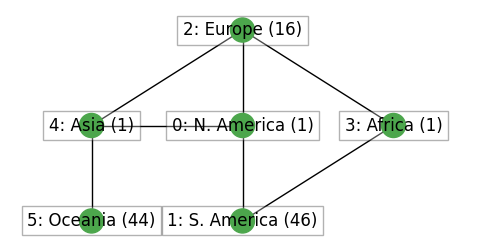

In [2]:
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)
game.agents = [PolicyGradientAgent(), RandomAgent(), RandomAgent()]

game.reset_world()
(deploy_rewards, attack_rewards, fortify_rewards,
                deploy_log_probs, attack_log_probs, fortify_log_probs) = (game.run_REINFORCE(max_turns=20))

print("Deploy rewards: ", deploy_rewards)
print("Attack rewards: ", attack_rewards)
print("Fortify rewards: ", fortify_rewards)

print("Deploy log probs: ", deploy_log_probs)
print("Attack log probs: ", attack_log_probs)
print("Fortify log probs: ", fortify_log_probs)

# Plot the final state of the game
game.visualize()

### L

Training:   0%|          | 0/100 [00:00<?, ?it/s]c:\Users\Louis\Documents\CentraleSupelec\3A_RL\Risk_RL\utils\game.py:360: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:485.)
  if deploy_policy_loss.grad is not None:
c:\Users\Louis\Documents\CentraleSupelec\3A_RL\Risk_RL\utils\game.py:365: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tenso

GAME 1
GAME 2
GAME 3
GAME 4
GAME 5
GAME 6
GAME 7
GAME 8
GAME 9
GAME 10
GAME 11
GAME 12
GAME 13
GAME 14


Training:  26%|██▌       | 26/100 [00:00<00:00, 86.14it/s]

GAME 15
GAME 16
GAME 17
GAME 18
GAME 19
GAME 20
GAME 21
GAME 22
GAME 23
GAME 24
GAME 25
GAME 26
GAME 27
GAME 28
GAME 29
GAME 30
GAME 31
GAME 32
GAME 33
GAME 34
GAME 35
GAME 36


Training:  46%|████▌     | 46/100 [00:00<00:00, 89.58it/s]

GAME 37
GAME 38
GAME 39
GAME 40
GAME 41
GAME 42
GAME 43
GAME 44
GAME 45
GAME 46
GAME 47
GAME 48
GAME 49
GAME 50
GAME 51
GAME 52
GAME 53
GAME 54
GAME 55
GAME 56


Training:  68%|██████▊   | 68/100 [00:00<00:00, 95.92it/s]

GAME 57
GAME 58
GAME 59
GAME 60
GAME 61
GAME 62
GAME 63
GAME 64
GAME 65
GAME 66
GAME 67
GAME 68
GAME 69
GAME 70
GAME 71
GAME 72
GAME 73
GAME 74
GAME 75
GAME 76
GAME 77


Training:  90%|█████████ | 90/100 [00:01<00:00, 92.78it/s]

GAME 78
GAME 79
GAME 80
GAME 81
GAME 82
GAME 83
GAME 84
GAME 85
GAME 86
GAME 87
GAME 88
GAME 89
GAME 90
GAME 91
GAME 92
GAME 93
GAME 94
GAME 95
GAME 96


Training: 100%|██████████| 100/100 [00:01<00:00, 86.68it/s]

GAME 97
GAME 98
GAME 99
GAME 100


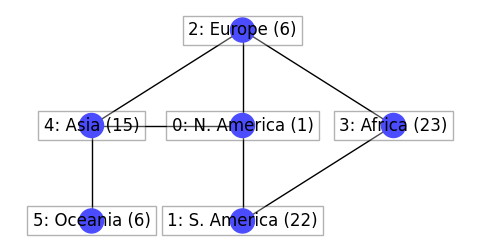

In [3]:
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)
# torch.autograd.set_detect_anomaly(True)

# Call a new agent and set it to train mode
Agent = PolicyGradientAgent()
Agent.deploy_policy.train()
Agent.attack_policy.train()
Agent.fortify_policy.train()

game.agents = [Agent, RandomAgent(), RandomAgent()]

start_dict = game.agents[0].attack_policy.input_fc.state_dict()['weight']

game.reset_world()
game.train_REINFORCE(num_games=100, max_turns=100)

end_dict = game.agents[0].deploy_policy.input_fc.state_dict()['weight']

# Plot the final state of the game
game.visualize()